# Task no 2:- Credit Card Fraud Detection
## Task Description:-
* The Objective: The main objective of this project is to develop a machine learning model that can accurately detect fraudulent credit card transactions.
* The Data Collection: The first step is to collect or find a dataset that contains information about credit card transactions. This dataset should ideally be labeled, meaning each transaction is marked as either fraudulent or not fraudulen
* The Data Preprocessing: This step involves cleaning the data (handling missing values, outliers etc.), performing exploratory data analysis to understand the patterns in the data, and preparing the data for modeling (feature scaling, encoding categorical variables etc.).
* The Model Building: Here, you’ll use various machine learning algorithms to train models on your preprocessed dataset. Algorithms can include logistic regression, random forest, deep learning, and others.
hers2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
data = pd.read_csv('creditcard.csv')

In [27]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [28]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
data.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [30]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [31]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [32]:
data.drop(columns=['Time'],inplace=True)

In [33]:
data.shape

(284807, 30)

In [34]:
X = data.drop(columns=['Class'])
y = data['Class']

In [35]:
data['Class'] = data['Class'].apply(lambda x: 1 if x == 1 else 0)

In [36]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [37]:
X = data.drop('Class', axis=1)
y = data['Class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [40]:
scaler = StandardScaler()
scaler.fit_transform(X_train_resampled)
scaler.fit_transform(X_test)

array([[ -8.4294878 ,   5.26603668, -12.24733135, ...,  -4.91408171,
         -3.1444534 ,   1.20222813],
       [  0.17523146,  -1.68426209,  -0.09044218, ...,   0.0994836 ,
          0.31109426,   1.88055411],
       [  0.71590036,  -0.36334475,   0.10829367, ...,   0.02746028,
          0.01709468,  -0.24721348],
       ...,
       [  0.02250105,  -0.06826748,  -0.83391485, ...,   0.87078148,
          1.07275263,  -0.34887754],
       [ -0.25069035,   0.60734232,   1.0950939 , ...,   0.09834779,
         -0.81117285,  -0.36645233],
       [ -0.80955191,   0.60791566,  -0.33913205, ...,   0.3057984 ,
         -1.82971929,   3.56055607]])

In [41]:
X_train = X_train_resampled
y_train = y_train_resampled

In [42]:
classifiers = {
    ' LogisticRegression': LogisticRegression(max_iter=1000,random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50,random_state=42)}

In [43]:
for name, classifier in classifiers.items():
    print(f"\nTraining and evaluating {name}...")
    classifier.fit(X_train_resampled,y_train_resampled)
    predictions = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)

    # Display classification report
    report = classification_report(y_test, predictions)

    # Print the results
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(f'{name} Classification Report:')
    print(report)


Training and evaluating  LogisticRegression...
 LogisticRegression Accuracy: 0.98
 LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962


Training and evaluating DecisionTreeClassifier...
DecisionTreeClassifier Accuracy: 1.00
DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.81      0.56        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962


Training and evaluating Random Forest...
Random Forest Accuracy: 1.00
Random Forest 

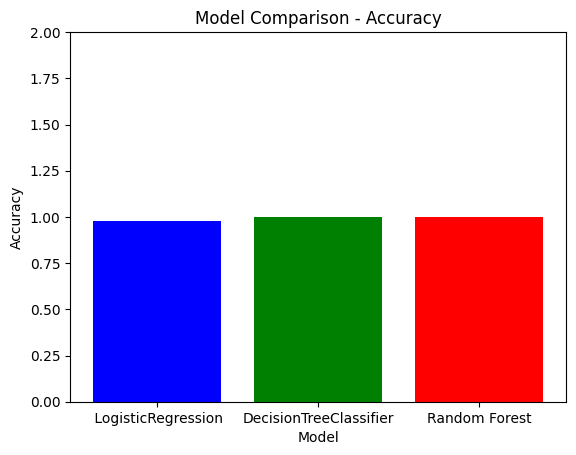

In [44]:
models = list(classifiers.keys())
accuracies = [0.98, 1.0, 1.0]  # Replace with your actual accuracy values

# Plotting model accuracies
plt.bar(models, accuracies, color=['blue','green', 'red'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 2)
plt.show()

# Conclusion:
* while the model can identify potentially fraudulent transactions, the final decision to classify a transaction as fraudulent should always incorporate expert judgement. This is to ensure that genuine transactions are not incorrectly flagged, leading to customer dissatisfaction.
* 
Overall, with careful implementation and regular maintenance, a Credit Card Fraud Detection system can be a powerful tool in the ongoing fight against financial fraud
